In [1]:
import os, sys, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
sys.path.append('..')
from prediction_denoise import prediction
from glob import glob
import numpy as np
import librosa
import IPython.display as ipd
from signal_utils import audio_files_to_numpy, numpy_audio_to_matrix_spectrogram, snr_db, psnr, apply_noise
from data_plot import plot_spectrogram, plot_3_spectograms
import matplotlib.pyplot as plt

In [2]:
def predict(audio_input_prediction, audio_output_prediction, sr=8000, name_model='model_unet', path='..\\data\\validation\\'):
    # path to find pre-trained weights / save models
    weights_path = '..\\data\\weights'
    # pre trained model
    name_model = name_model
    # directory where read noisy sound to denoise
    audio_dir_prediction = f'{path}noisy_voice'
    # directory to save the denoise sound
    dir_save_prediction = f'{path}save_prediction\\'
    # Name noisy sound file to denoise
    audio_input_prediction = [audio_input_prediction]
    # Name of denoised sound file to save
    audio_output_prediction = audio_output_prediction
    # Sample rate to read audio
    sample_rate = sr
    # Minimum duration of audio files to consider
    min_duration = 1.0
    # Frame length for training data
    frame_length = 8064
    # hop length for sound files
    hop_length_frame = 8064
    # nb of points for fft(for spectrogram computation)
    n_fft = 255
    # hop length for fft
    hop_length_fft = 63
    
    prediction(weights_path, name_model, audio_dir_prediction, dir_save_prediction, audio_input_prediction,
               audio_output_prediction, sample_rate, min_duration, frame_length, hop_length_frame, n_fft,
               hop_length_fft)

# Comparision of different SNR

## Read clean voices

In [3]:
clean_voices_list = glob('..\\data\\snr_test\\clean_voice\\*')
clean_voices_list = [os.path.basename(voice) for voice in clean_voices_list]
print(clean_voices_list)

['marcin_clean.wav']


## Read noises

In [4]:
noises_list = glob('..\\data\\snr_test\\noise\\*')
noises_list = [os.path.basename(noise) for noise in noises_list]
print(noises_list)

['keyboard.wav']


## Apply noise and compare

### Marcin - keyboard

Apply noises with different SNRs. Normalize input clean voice. Noises are also normalized befor applying.

In [5]:
multipliers = [0.2, 0.3, 0.4, 0.5, 0.8, 0.9, 1, 1.1, 1.5, 2, 2.5, 3, 4, 6, 8, 10, 14, 20, 30, 50, 100]
#multipliers = np.logspace(0, 2, 10, base=10)
print(multipliers)
s, fs = librosa.load(os.path.join('..\\data\\snr_test\\clean_voice', clean_voices_list[0]))
s_norm = librosa.util.normalize(s)
snrs = []
n, _ = librosa.load(os.path.join('..\\data\\snr_test\\noise', noises_list[0]))
n_norm = librosa.util.normalize(n)
for i, multiplier in enumerate(multipliers):
    snrs.append(snr_db(s_norm, n_norm * multiplier))
    apply_noise('..\\data\\snr_test\\noisy_voice\\',
                               f'{clean_voices_list[0][:-9]}{i}_{noises_list[0]}', s_norm, n_norm * multiplier, fs)
print(snrs)

[0.2, 0.3, 0.4, 0.5, 0.8, 0.9, 1, 1.1, 1.5, 2, 2.5, 3, 4, 6, 8, 10, 14, 20, 30, 50, 100]
[22.6, 19.08, 16.58, 14.65, 10.56, 9.54, 8.62, 7.8, 5.1, 2.6, 0.67, -0.92, -3.42, -6.94, -9.44, -11.38, -14.3, -17.4, -20.92, -25.35, -31.38]


In [6]:
np.sqrt([0, 1, 3, 6, 8, 10, 100])

array([ 0.        ,  1.        ,  1.73205081,  2.44948974,  2.82842712,
        3.16227766, 10.        ])

Denoise

In [10]:
# noisy_voices_list = glob('..\\data\\snr_test\\noisy_voice\\*')
noisy_voices_list = sorted(glob('..\\data\\snr_test\\noisy_voice\\*'), key=len)
noisy_voices_list = [os.path.basename(voice) for voice in noisy_voices_list]
print(noisy_voices_list)

['marcin_0_keyboard.wav', 'marcin_1_keyboard.wav', 'marcin_2_keyboard.wav', 'marcin_3_keyboard.wav', 'marcin_4_keyboard.wav', 'marcin_5_keyboard.wav', 'marcin_6_keyboard.wav', 'marcin_7_keyboard.wav', 'marcin_8_keyboard.wav', 'marcin_9_keyboard.wav', 'marcin_10_keyboard.wav', 'marcin_11_keyboard.wav', 'marcin_12_keyboard.wav', 'marcin_13_keyboard.wav', 'marcin_14_keyboard.wav', 'marcin_15_keyboard.wav', 'marcin_16_keyboard.wav', 'marcin_17_keyboard.wav', 'marcin_18_keyboard.wav', 'marcin_19_keyboard.wav', 'marcin_20_keyboard.wav']


In [11]:
for voice in noisy_voices_list:
    predict(audio_input_prediction=voice, audio_output_prediction=f'pred_{voice}', path='..\\data\\snr_test\\')

Loaded model from disk
128
(4, 128, 128)
(4, 128, 128)
8064
63
Loaded model from disk
128
(4, 128, 128)
(4, 128, 128)
8064
63
Loaded model from disk
128
(4, 128, 128)
(4, 128, 128)
8064
63
Loaded model from disk
128
(4, 128, 128)
(4, 128, 128)
8064
63
Loaded model from disk
128
(4, 128, 128)
(4, 128, 128)
8064
63
Loaded model from disk
128
(4, 128, 128)
(4, 128, 128)
8064
63
Loaded model from disk
128
(4, 128, 128)
(4, 128, 128)
8064
63
Loaded model from disk
128
(4, 128, 128)
(4, 128, 128)
8064
63
Loaded model from disk
128
(4, 128, 128)
(4, 128, 128)
8064
63
Loaded model from disk
128
(4, 128, 128)
(4, 128, 128)
8064
63
Loaded model from disk
128
(4, 128, 128)
(4, 128, 128)
8064
63
Loaded model from disk
128
(4, 128, 128)
(4, 128, 128)
8064
63
Loaded model from disk
128
(4, 128, 128)
(4, 128, 128)
8064
63
Loaded model from disk
128


(4, 128, 128)
(4, 128, 128)
8064
63
Loaded model from disk
128
(4, 128, 128)
(4, 128, 128)
8064
63
Loaded model from disk
128
(4, 128, 128)
(4, 128, 128)
8064
63
Loaded model from disk
128
(4, 128, 128)
(4, 128, 128)
8064
63
Loaded model from disk
128
(4, 128, 128)
(4, 128, 128)
8064
63
Loaded model from disk
128
(4, 128, 128)
(4, 128, 128)
8064
63
Loaded model from disk
128
(4, 128, 128)
(4, 128, 128)
8064
63
Loaded model from disk
128
(4, 128, 128)
(4, 128, 128)
8064
63


Calculate PSNRs

In [13]:
original, fs = librosa.load(os.path.join('..\\data\\snr_test\\clean_voice', clean_voices_list[0]))
original_norm = librosa.util.normalize(original)
# predicted_voices_list = glob('..\\data\\snr_test\\save_prediction\\*')
predicted_voices_list = sorted(glob('..\\data\\snr_test\\save_prediction\\*'), key=len)
predicted_voices_list = [os.path.basename(voice) for voice in predicted_voices_list]
print(predicted_voices_list)

psnrs = []
for voice in predicted_voices_list:
    pred, fs = librosa.load(os.path.join('..\\data\\snr_test\\save_prediction', voice))
    psnrs.append(psnr(original_norm[:pred.shape[0]], pred))
print(psnrs)

['pred_marcin_0_keyboard.wav', 'pred_marcin_1_keyboard.wav', 'pred_marcin_2_keyboard.wav', 'pred_marcin_3_keyboard.wav', 'pred_marcin_4_keyboard.wav', 'pred_marcin_5_keyboard.wav', 'pred_marcin_6_keyboard.wav', 'pred_marcin_7_keyboard.wav', 'pred_marcin_8_keyboard.wav', 'pred_marcin_9_keyboard.wav', 'pred_marcin_10_keyboard.wav', 'pred_marcin_11_keyboard.wav', 'pred_marcin_12_keyboard.wav', 'pred_marcin_13_keyboard.wav', 'pred_marcin_14_keyboard.wav', 'pred_marcin_15_keyboard.wav', 'pred_marcin_16_keyboard.wav', 'pred_marcin_17_keyboard.wav', 'pred_marcin_18_keyboard.wav', 'pred_marcin_19_keyboard.wav', 'pred_marcin_20_keyboard.wav']
[25.0, 24.96, 24.95, 24.95, 24.96, 24.94, 24.92, 24.91, 24.83, 24.63, 24.08, 23.34, 22.04, 20.28, 19.51, 19.04, 18.73, 18.56, 18.4, 18.33, 18.28]


### Input SNR and predicted PSNR relationship

Text(0, 0.5, 'PSNR predict to clean [dB]')

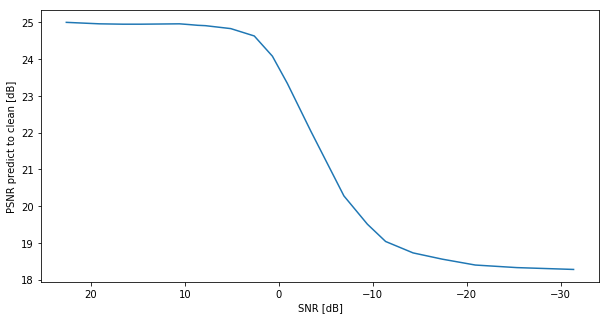

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(snrs, psnrs)
ax.invert_xaxis()
ax.set_xlabel('SNR [dB]')
ax.set_ylabel('PSNR predict to clean [dB]')

# TEMP - will remove

(96334,) 22050
(88906,) 22050
(88906,) 22050
25.0
24.96


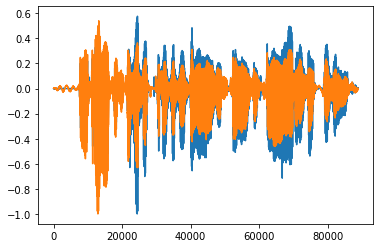

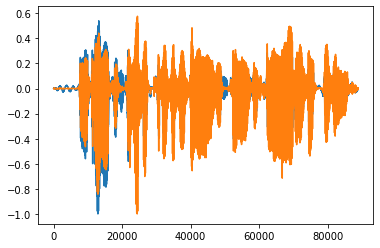

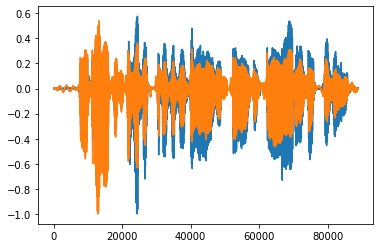

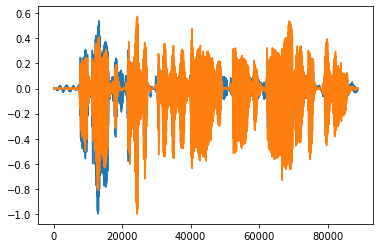

In [70]:
test1, fs = librosa.load(os.path.join('..\\data\\snr_test\\clean_voice', 'marcin_clean.wav'))
print(test1.shape, fs)
t1 = librosa.util.normalize(test1)

test3, fs = librosa.load(os.path.join('..\\data\\snr_test\\save_prediction', 'pred_marcin_0_keyboard.wav'))
print(test3.shape, fs)
t3 = librosa.util.normalize(test3)

test4, fs = librosa.load(os.path.join('..\\data\\snr_test\\save_prediction', 'pred_marcin_4_keyboard.wav'))
print(test4.shape, fs)
t4 = librosa.util.normalize(test4)

plt.figure()
plt.plot(t3)
plt.plot(t1[:t3.shape[0]])

plt.figure()
plt.plot(t1[:t3.shape[0]])
plt.plot(t3)


plt.figure()
plt.plot(t4)
plt.plot(t1[:t4.shape[0]])

plt.figure()
plt.plot(t1[:t4.shape[0]])
plt.plot(t4)

p1 = psnr(t1[:test3.shape[0]], test3)
print(p1)
p2 = psnr(t1[:test4.shape[0]], test4)
print(p2)